In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
data = pd.read_csv('../data/treasury_data.csv')
data.head()

,month-year,tot_pub_debt_out_amt,Surplus (+) or Deficit (-),Total Outlays,Total Receipts
0,2015-03,1.815206e+13,-5.291006e+10,2.870974e+11,2.341873e+11
1,2015-04,1.815256e+13,1.567141e+11,3.150872e+11,4.718012e+11
2,2015-05,1.815285e+13,-8.238528e+10,2.947711e+11,2.123858e+11
3,2015-06,1.815200e+13,5.177576e+10,2.911573e+11,3.429331e+11
4,2015-07,1.815132e+13,-1.491868e+11,3.746801e+11,2.254934e+11


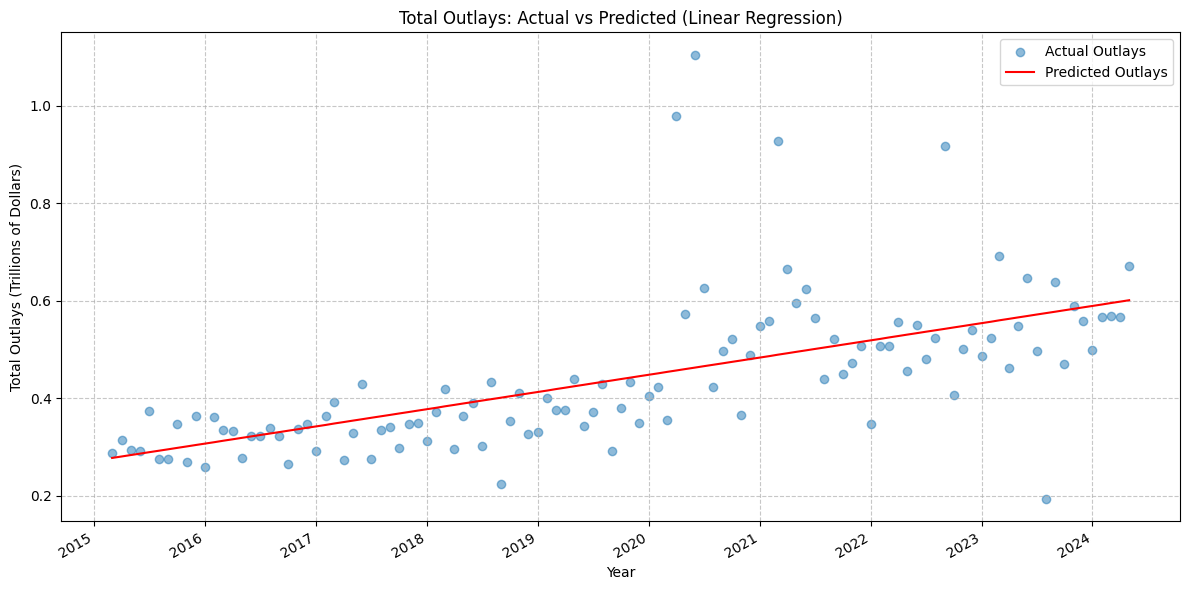

                            OLS Regression Results                            
Dep. Variable:          Total Outlays   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     65.87
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           7.94e-13
Time:                        15:36:51   Log-Likelihood:                 76.742
No. Observations:                 111   AIC:                            -149.5
Df Residuals:                     109   BIC:                            -144.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time_index     0.0029      0.000      8.116      0.0

In [15]:
from statsmodels.tsa.tsatools import add_trend
from statsmodels.api import OLS
import matplotlib.dates as mdates

# Load the data
data = pd.read_csv('../data/treasury_data.csv', parse_dates=['month-year'])
data = data.sort_values('month-year')

# Create a time index
data['time_index'] = range(len(data))

# Convert outlays to trillions
data['Total Outlays'] /= 1e12

# Prepare the data for regression
X = add_trend(data['time_index'], trend='c')
y = data['Total Outlays']

# Fit the model
model = OLS(y, X).fit()

# Generate predictions
data['predicted_outlays'] = model.predict(X)



# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(data['month-year'], data['Total Outlays'], label='Actual Outlays', alpha=0.5)
plt.plot(data['month-year'], data['predicted_outlays'], label='Predicted Outlays', color='red')
plt.title('Total Outlays: Actual vs Predicted (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Total Outlays (Trillions of Dollars)')
plt.legend()

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Display the plot
plt.show()

# Print the regression summary
print(model.summary())

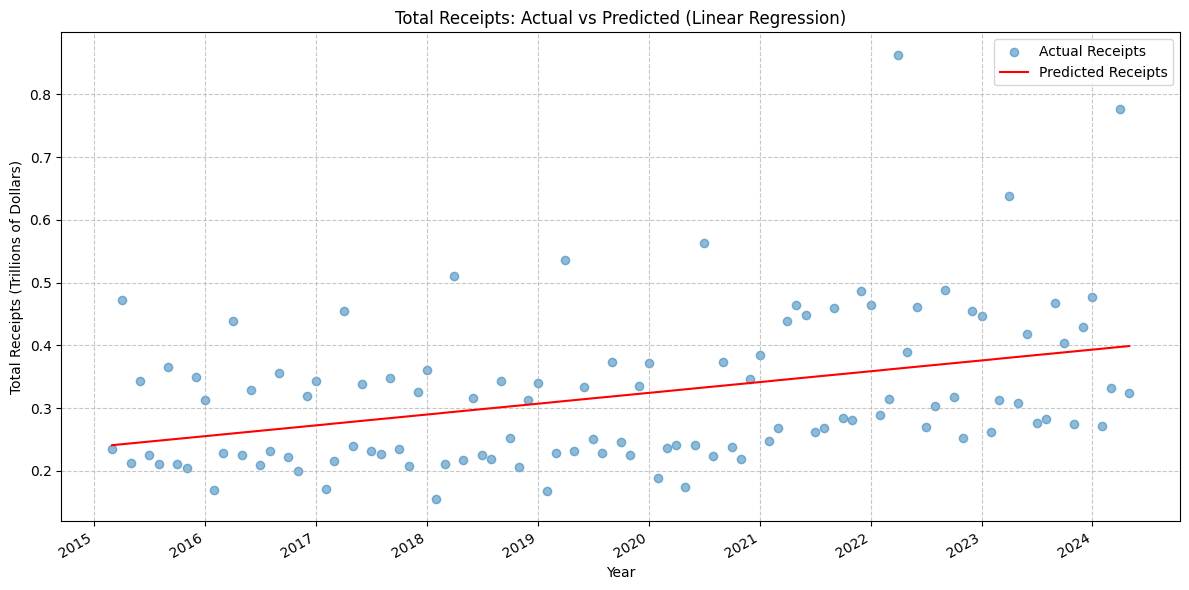

                            OLS Regression Results                            
Dep. Variable:         Total Receipts   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     18.70
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.40e-05
Time:                        15:49:00   Log-Likelihood:                 86.354
No. Observations:                 111   AIC:                            -168.7
Df Residuals:                     109   BIC:                            -163.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time_index     0.0014      0.000      4.324      0.0

In [19]:
from statsmodels.tsa.tsatools import add_trend
from statsmodels.api import OLS
import matplotlib.dates as mdates

# Load the data
data = pd.read_csv('../data/treasury_data.csv', parse_dates=['month-year'])
data = data.sort_values('month-year')

# Create a time index
data['time_index'] = range(len(data))

# Convert Receipts to trillions
data['Total Receipts'] /= 1e12

# Prepare the data for regression
X = add_trend(data['time_index'], trend='c')
y = data['Total Receipts']

# Fit the model
model = OLS(y, X).fit()

# Generate predictions
data['predicted_Receipts'] = model.predict(X)



# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(data['month-year'], data['Total Receipts'], label='Actual Receipts', alpha=0.5)
plt.plot(data['month-year'], data['predicted_Receipts'], label='Predicted Receipts', color='red')
plt.title('Total Receipts: Actual vs Predicted (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Total Receipts (Trillions of Dollars)')
plt.legend()

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Display the plot
plt.show()

# Print the regression summary
print(model.summary())

### Adding forecast

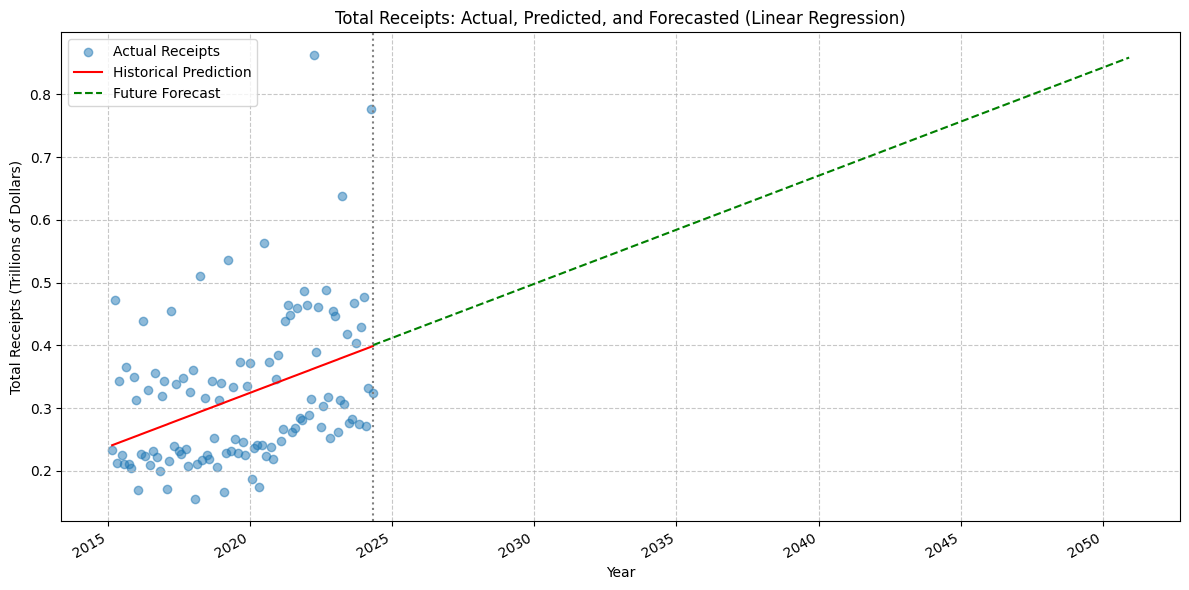

In [29]:
from statsmodels.tsa.tsatools import add_trend
from statsmodels.api import OLS
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

# Load the data
data = pd.read_csv('../data/treasury_data.csv', parse_dates=['month-year'])
data = data.sort_values('month-year')

# Create a time index
data['time_index'] = range(len(data))

# Convert Receipts to trillions
data['Total Receipts'] /= 1e12

# Prepare the data for regression
X = add_trend(data['time_index'], trend='c')
y = data['Total Receipts']

# Fit the model
model = OLS(y, X).fit()

# Generate predictions for existing data
data['predicted_Receipts'] = model.predict(X)

# Create future dates up to 2050
last_date = data['month-year'].max()
future_dates = pd.date_range(start=last_date, end='2050-12-31', freq='MS')
future_data = pd.DataFrame({'month-year': future_dates})
future_data['time_index'] = range(len(data), len(data) + len(future_data))

# Generate predictions for future data
X_future = add_trend(future_data['time_index'], trend='c')
future_data['predicted_Receipts'] = model.predict(X_future)

# Combine historical and future data
all_data = pd.concat([data, future_data], ignore_index=True)

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(data['month-year'], data['Total Receipts'], label='Actual Receipts', alpha=0.5)
plt.plot(data['month-year'], data['predicted_Receipts'], label='Historical Prediction', color='red')
plt.plot(future_data['month-year'], future_data['predicted_Receipts'], label='Future Forecast', color='green', linestyle='--')

plt.title('Total Receipts: Actual, Predicted, and Forecasted (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Total Receipts (Trillions of Dollars)')
plt.legend()

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show every 5 years

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add vertical line to separate historical data from forecast
forecast_start = data['month-year'].max()
plt.axvline(x=forecast_start, color='gray', linestyle=':', label='Forecast Start')

plt.tight_layout()

# Display the plot
plt.show()

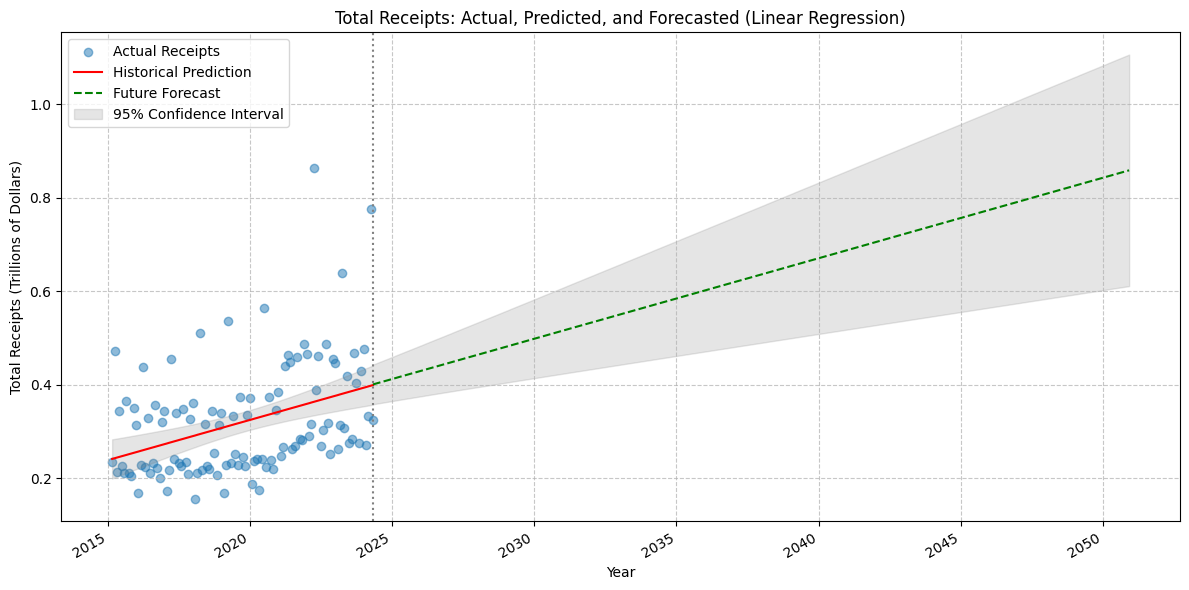

In [30]:
# Load the data
data = pd.read_csv('../data/treasury_data.csv', parse_dates=['month-year'])
data = data.sort_values('month-year')

# Create a time index
data['time_index'] = range(len(data))

# Convert Receipts to trillions
data['Total Receipts'] /= 1e12

# Prepare the data for regression
X = add_trend(data['time_index'], trend='c')
y = data['Total Receipts']

# Fit the model
model = OLS(y, X).fit()

# Generate predictions and confidence intervals for existing data
predictions = model.get_prediction(X)
data['predicted_Receipts'] = predictions.predicted_mean
data['ci_lower'], data['ci_upper'] = predictions.conf_int().T

# Create future dates up to 2050
last_date = data['month-year'].max()
future_dates = pd.date_range(start=last_date, end='2050-12-31', freq='MS')
future_data = pd.DataFrame({'month-year': future_dates})
future_data['time_index'] = range(len(data), len(data) + len(future_data))

# Generate predictions and confidence intervals for future data
X_future = add_trend(future_data['time_index'], trend='c')
future_predictions = model.get_prediction(X_future)
future_data['predicted_Receipts'] = future_predictions.predicted_mean
future_data['ci_lower'], future_data['ci_upper'] = future_predictions.conf_int().T

# Combine historical and future data
all_data = pd.concat([data, future_data], ignore_index=True)

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(data['month-year'], data['Total Receipts'], label='Actual Receipts', alpha=0.5)
plt.plot(data['month-year'], data['predicted_Receipts'], label='Historical Prediction', color='red')
plt.plot(future_data['month-year'], future_data['predicted_Receipts'], label='Future Forecast', color='green', linestyle='--')

# Add confidence intervals
plt.fill_between(all_data['month-year'], all_data['ci_lower'], all_data['ci_upper'], 
                 color='gray', alpha=0.2, label='95% Confidence Interval')

plt.title('Total Receipts: Actual, Predicted, and Forecasted (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Total Receipts (Trillions of Dollars)')
plt.legend()

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show every 5 years

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add vertical line to separate historical data from forecast
forecast_start = data['month-year'].max()
plt.axvline(x=forecast_start, color='gray', linestyle=':', label='Forecast Start')

plt.tight_layout()

# Display the plot
plt.show()

In [33]:
from statsmodels.tsa.tsatools import add_trend
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
import mpld3
from mpld3 import plugins

# Load the data
data = pd.read_csv('../data/treasury_data.csv', parse_dates=['month-year'])
data = data.sort_values('month-year')

# Create a time index
data['time_index'] = range(len(data))

# Convert to trillions
data['Total Receipts'] /= 1e12
data['Total Outlays'] /= 1e12

# Prepare the data for regression
X = add_trend(data['time_index'], trend='c')
y_receipts = data['Total Receipts']
y_outlays = data['Total Outlays']

# Fit the models
model_receipts = OLS(y_receipts, X).fit()
model_outlays = OLS(y_outlays, X).fit()

# Generate predictions for existing data
data['predicted_Receipts'] = model_receipts.predict(X)
data['predicted_Outlays'] = model_outlays.predict(X)

# Create future dates up to 2050
last_date = data['month-year'].max()
future_dates = pd.date_range(start=last_date, end='2050-12-31', freq='MS')
future_data = pd.DataFrame({'month-year': future_dates})
future_data['time_index'] = range(len(data), len(data) + len(future_data))

# Generate predictions for future data
X_future = add_trend(future_data['time_index'], trend='c')
future_data['predicted_Receipts'] = model_receipts.predict(X_future)
future_data['predicted_Outlays'] = model_outlays.predict(X_future)

# Combine historical and future data
all_data = pd.concat([data, future_data], ignore_index=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Receipts
line1 = ax1.scatter(data['month-year'], data['Total Receipts'], label='Actual Receipts', alpha=0.5, color='blue')
line2, = ax1.plot(data['month-year'], data['predicted_Receipts'], label='Historical Prediction (Receipts)', color='darkblue')
line3, = ax1.plot(future_data['month-year'], future_data['predicted_Receipts'], label='Future Forecast (Receipts)', color='lightblue', linestyle='--')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Receipts (Trillions of Dollars)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Total Outlays
ax2 = ax1.twinx()
line4 = ax2.scatter(data['month-year'], data['Total Outlays'], label='Actual Outlays', alpha=0.5, color='red')
line5, = ax2.plot(data['month-year'], data['predicted_Outlays'], label='Historical Prediction (Outlays)', color='darkred')
line6, = ax2.plot(future_data['month-year'], future_data['predicted_Outlays'], label='Future Forecast (Outlays)', color='lightcoral', linestyle='--')

ax2.set_ylabel('Total Outlays (Trillions of Dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Receipts and Outlays: Actual, Predicted, and Forecasted')

# Combine legends
lines = [line1, line2, line3, line4, line5, line6]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Format x-axis to show only years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator(5))  # Show every 5 years

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Add gridlines
ax1.grid(True, linestyle='--', alpha=0.7)

# Add vertical line to separate historical data from forecast
forecast_start = data['month-year'].max()
ax1.axvline(x=forecast_start, color='gray', linestyle=':', label='Forecast Start')

# Add tooltips
tooltip = plugins.PointHTMLTooltip(line1, labels=[f'Date: {d:%Y-%m-%d}<br>Receipts: ${r:.2f}T<br>Outlays: ${o:.2f}T' for d, r, o in zip(data['month-year'], data['Total Receipts'], data['Total Outlays'])])
plugins.connect(fig, tooltip)

# Enable zoom
plugins.connect(fig, plugins.Zoom())

plt.tight_layout()

# Display the interactive plot
mpld3.display(fig)

# Print the regression summaries
print("Receipts Regression Summary:")
print(model_receipts.summary())
print("\nOutlays Regression Summary:")
print(model_outlays.summary())

Receipts Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         Total Receipts   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     18.70
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.40e-05
Time:                        16:04:07   Log-Likelihood:                 86.354
No. Observations:                 111   AIC:                            -168.7
Df Residuals:                     109   BIC:                            -163.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time_index     0.0014  

c:\Users\diego\OneDrive\Escritorio\Github\diodz.github.io\venv\Lib\site-packages\mpld3\mplexporter\exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
